# A* graph traversal implementation

This work is baded on the articles in wikipedia and geeks for geeks. (Stackoverflow is a given)

<div class="alert alert-info">
    <h2>Part 1: Problem introduction and A* explanation </h2>
</div>

In [9]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML 

**Problem** : The problem at hand can be reduced to path finding in a graph. Grids can be reduced to undirected graphs with cells having 2 states : accessible or blocked. Owing to some knowledge in graph theory, I implemented A* algorithm in python to find a path in a grid.

**Solution** : 
Let's consider a 2D grid, thoough the algorith below can be generalised to any dimension. Each cell in the given grid has typically 8 neighbours as illustrated below : 

In [13]:
Image(url= "https://www.researchgate.net/profile/Toni-Oesterlund/publication/258434100/figure/fig7/AS:646478561284120@1531143908746/Cellular-Automata-grid-and-neighbours-presented-as-graphs-From-the-left-the-active-cell.png")

We want to move from a cell to its most promising neighbour, if the neighbour is within the grid and accessible. To assess the fit of a cell we use heuristics which are functions that approximately measure how good a cell is in terms of approaching our destination. Here the heuristics are distance functions : Manhattan distance, Euclidean distance and Diagonal distance. using this function, we can employ the A* algorithm to find a path.

**The A* algorithm** 
A* is one of the most known algorithms in path finding and graph traversal. What sets A* appart from other algorithms sych as : Dijkstra, DFS or BFS is that is an informed algorithm, mainly using the heuristics as mentioned above.

**Detailed explanation**

Let's agagin consider a square grid that can have obstacles, a starting point and a destination. Our goal is to reach the destination, if that is doable, as fast as we can and here where the heuuristics comes in as an informed guess on the next steps. At each step, we compute a function value that is the sum of the distance to the target cell and the cost to move from the current cell to the candidate cell : These are named below **heur** and **cost** respectively. The algoorithm then picks the node having the lowest function value as its next cell and repeats the proceduure until reaching the target.

**Algorithmm steps** 
We begin by creating two lists a closed list and ann open list which are the set of visited and to visit cells respectively. 

1. Initialize the open list and put the starting node inside it. 
2. Initialize the close list.
3. While the open list is not empty (there more cells to explore):

    1. find the cell with least value function, denote it "c".
    2. Discard and retrieve c from the open list.
    3. Detect c's 8 neighbours and set their parent to c.
    4. For each neighbour:
    
        a) if the current cell is the goal then stop and set the cell's cost and heuristic.
        
        b) if a cell with the same position and lower value is in the openn list then 
        ignore the cell
        
        c) if a cell with the same position and a lower value function is in the closed list
            then ignore, else add the cell to the openn list.
     end  the for loop
  
    5. push c in the closet list.
6. Terminate the while loop.

<div class="alert alert-info">
    <h2>Part 2: Coding part </h2>
</div>

### Class to hold points info

In [1]:
class pointInfo():
    """Class to store grid points as graph nodes.
    """
    def __init__(self, x, y, val, px=-1, py=-1):
        """Function to intialise points info.

        :param int x:
            x-coordinate of the point
        :param int y:
            y-coordinate of the point
        :param int val:
            The value of the point in the grid (0 or 1)
        :param int px:
            x-coordinate of the parent point
        :param int py:
            y-coordinate of the parent point
        :returns:
            None.
        :rtype:
            None
        """
        self.x = x
        self.y = y
        self.val = val
        self.px = px
        self.py = py
        self.fval = float('inf')
        self.heur = float('inf')
        self.cost = float('inf')

    def __eq__(self, other) -> bool:
        """Function to assess if two points are equal.
        :param infoPoint self:
            The first point
        :param infoPoint other:
            The second point
        :returns:
            Returns True if the two points are the same, False otherwise.
        :rtype:
            bool
        """
        return self.x == other.x and self.y == other.y

    def isUnblockedCell(self) -> bool:
        """Function to assess a point is blocked.
        :param infoPoint self:
            The point to check
        :returns:
            Returns True if the point is unblocked, False otherwise.
        :rtype:
            bool
        """
        return self.val != 1

### Utilities 

In [2]:
def isValidCell(point_coor, grid_size) -> bool:
    """Assess if a given point is within the grid.
    :param array-like point_coor:
        Array-like object of size 2 that holds the x and y
        coordinates of a given point.
    :param array-like grid_size:
        Array-like object of size 2 taht holds the number
        of rows and cols in the grid.
    :returns:
        True if the point is within the grid, False otherwise.
    :rtype:
        bool
    """
    x, y = point_coor  # get the coordinates of the point
    rows, cols = grid_size  # get the rows and cols
    return (x >= 0) and (x < rows) and (y >= 0) and (y < cols)

In [3]:
def heuristic(a, b, method='Manhattan') -> float:
    """Function to compute distance to the goal.

    Used to determine which point in the grid is nearer
    to the goal.
    :param pointInfo a:
        The first point
    :param pointinfo b:
        The second point.
    : param string method:
        the metric used too compute the distance.
    :returns:
        The distance between the points.
    :rtype:
        float
    """
    assert method in ["Manhattan", "Euclidean", "Diagonal"],\
        "Method can only be one of the following : Manhattan,\
        Euclidean or Diagonal"
    if method == 'Manhattan':
        distance = abs(a.x - b.x) + abs(a.y - b.y)
    elif method == 'Euclidean':
        distance = ((a.x-b.x)**2 + (a.y-b.y)**2)**0.5
    else:
        distance = abs(a.x-b.x) + abs(a.y-b.y) + \
            (2 ** 0.5 - 2) * min(abs(a.x-b.x), abs(a.y-b.y))
    return distance

In [4]:
def backtrackPath(pointsGrid, stop, verbose=True) -> list:
    """backtrack through points to find path.

   Used to loop through the grid and return the path.

    :param list of lists of pointInfo points_grid:
        A grid that holds all relevant info on the points.
    :param infoPoint stop:
        The end point to reach
    :param bool verbose:
        Whether or not too print the path
    :returns:
        the path from the start to the goal.
    :rtype:
        list
    """
    # Intialise the path to empty
    # get the end point to backtrack
    row, col, path = stop.x, stop.y, []
    # backtrack through the grid until reaching the start
    # the start is characterised by being itself's parent
    while not (pointsGrid[row][col].px == row
               and pointsGrid[row][col].py == col):
        path.append([row, col])
        tempRow = pointsGrid[row][col].px
        tempCol = pointsGrid[row][col].py
        row = tempRow
        col = tempCol
    path.append([row, col])
    # reverse the path
    path.reverse()
    # print if verbose
    if verbose:
        literal = ''
        for cell in path:
            literal + str(cell[0])+str(cell[1])+'->'
        print('Path is ', literal)
    return path

### A* algorithm

In [66]:
def myPathPlanning(grid, start, stop, method='Manhattan', lookup=4):
    """Executes A* algorithm on a grid.

    Determines if a path can be found between the start and
    the stop given by the user.

    :param list of list grid:
        A list of list that consists of 0 and 1.
    :param list start:
        A list including the x and y coordinates of the
        start point.
    :param list stop:
        A list including the x and y coordinates of the
        stop point.
    :param string method:
        The heuristic to use. See the heuristic function.
    :param int lookup:
        Number of directions to look into, can be 4 or 8.
    :returns:
        The path if found otherwise no output.
    :rtype:
        list
    """
    # get the number rows and cols of the grid
    gridSize = (len(grid), len(grid[0]))
    # check the lookup 
    assert lookup in [4, 8], 'Lookup can be 4 or 8'
    # Convert the grid cells into points class
    pointsGrid = [[pointInfo(i, j, grid[i][j]) for j in range(gridSize[1])]
                  for i in range(gridSize[0])]
    # We check if the Start, stop are not in the grid
    if not isValidCell((start[0], start[1]), gridSize):
        print("The start is out of the grid")
        return None
    if not isValidCell((stop[0], stop[1]), gridSize):
        print("The stop is out of the grid")
        return None
    # set the start node on the grid
    # set the stopping criteria as mentioned in the
    # backtrack function (itself's parent)
    # set statistics to 0
    x, y = start[0], start[1]
    pointsGrid[x][y].px, pointsGrid[x][y].py = x, y
    pointsGrid[x][y].val = grid[x][y]
    pointsGrid[x][y].fval = 0
    pointsGrid[x][y].cost = 0
    pointsGrid[x][y].heur = 0
    # convert the stop to pointInfo class for ease
    stop = pointInfo(stop[0], stop[1], grid[stop[0]][stop[1]])
    # check if the start ot the stop are blocked
    if not pointsGrid[x][y].isUnblockedCell():
        print("The start is a blocked cell")
        return None
    if not stop.isUnblockedCell():
        print("The stop is a blocked cell")
        return None
    # Early stopping if the start is the stop
    if pointsGrid[x][y] == stop:
        print("stop already reached, nothing to do\n")
        return None
    # Intialise an empty closed list to hold the cells for later
    # initialise a boolean variable for to see if we reached the stop
    openList, reached = [pointsGrid[x][y]], False
    # Intilaise a boolean closed list to keep track of visited cells
    closedList = [[False for j in range(gridSize[1])]
                  for i in range(gridSize[0])]
    # Loop while there more cells to explore
    while len(openList) > 0:
        # discard the promising cell and retrieve it
        cell = openList.pop(0)
        x, y = cell.x, cell.y
        closedList[x][y] == True
        # generate all neighbours coordinates
        if lookup == 8 :
            neighbourPosList = [[x+i, y+j] for i in range(-1, 2) for j in range(-1,2)]
            neighbourPosList.remove([x, y])
        else : 
            neighbourPosList = [[x+1, y], [x-1, y], [x, y-1], [x, y+1]]
        # Loop through neighbours
        for neighbourPos in neighbourPosList:
            xn, yn = neighbourPos # get x and y 
            # Only check neighbour if it is valid
            if isValidCell(neighbourPos, gridSize):
                # Check if the current cell is the Stop
                if pointsGrid[xn][yn] == stop:
                    # Set the parents of the Stop cells
                    pointsGrid[xn][yn].px = cell.x
                    pointsGrid[xn][yn].py = cell.y
                    print("Stop reached")
                    # backtrack to get path
                    path = backtrackPath(pointsGrid, stop)
                    reached = True
                    return path
                # Ignore cell if it is blocked or in the closed list
                # Else compute statitic and add to the open list
                # if it is in the open list, update statistics
                else :
                    if not closedList[xn][yn] and pointsGrid[xn][yn].isUnblockedCell(): 
                        # compute cost and heuristic values
                        cost = pointsGrid[cell.x][cell.y].cost + heuristic(cell, pointsGrid[xn][yn], method='Euclidean')
                        heur = heuristic(pointsGrid[xn][yn], stop, method)
                        # update statistics
                        if pointsGrid[xn][yn].fval == float('inf') or pointsGrid[xn][yn].fval > heur+cost:
                            # Update the details of the cell
                            pointsGrid[xn][yn].fval = heur+cost
                            pointsGrid[xn][yn].cost = cost
                            pointsGrid[xn][yn].heur = heur
                            pointsGrid[xn][yn].px = cell.x
                            pointsGrid[xn][yn].py = cell.y
                            # Add to openList
                            openList.append(pointsGrid[xn][yn])
    # if no path can be found
    if not reached:
        print("Failed to find a path")

    return None

### Plotting path

In [77]:
def plotPath(grid, start, stop, pathPlan):
    """Plots a pth on a grid.

    :param list of list grid:
        A list of list that consists of 0 and 1.
    :param list start:
        A list including the x and y coordinates of the
        start point.
    :param list stop:
        A list including the x and y coordinates of the
        stop point.
    :param list pathPlan:
        The path planning
    :returns:
        None, draws a grid.
    :rtype:
        None
    """
    # Check for  empty path
    # give different colors for point of interest
    # green : okay, red : blocked
    # black : path, yellow : start
    # blue : stop
    try:
        for entry in pathPlan:
            grid[entry[0]][entry[1]] = 2
    except:
        print('Empty path')
    grid[start[0]][start[1]] = 3
    grid[stop[0]][stop[1]] = 4
    colors = 'green red black yellow blue'.split()
    # get custom color map
    cmap = matplotlib.colors.ListedColormap(colors, name='colors', N=None)
    plt.figure()
    plt.imshow(grid, cmap=cmap)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Grid')

### Testing the algorithm

Stop reached
Path is  


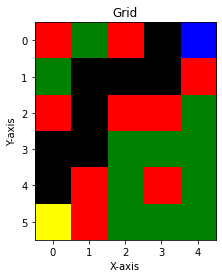

In [76]:
grid = [[1,0,1,0,0], [0,0,0,0,1], [1,0,1,1,0], [0,0,0,0,0], [0,1,0,1,0], [0, 1, 0, 0, 0]]
start = [5, 0]
stop = [0, 4]
pathPlan = myPathPlanning(grid, start, stop, lookup=4)
plotPath(grid, start, stop, pathPlan)
